In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font',family=font_name)
import matplotlib as mlp
mlp.rcParams['axes.unicode_minus'] = False

In [156]:
import mglearn

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris, load_boston, load_breast_cancer

In [51]:
from sklearn.tree import export_graphviz
import graphviz

# 1. DecisionTreeClassifier
- 일련의 질문에 근거하여 주어진 데이터를 분류하는 알고리즘
- 설명하기 좋은 알고리즘
- 과적합 심각
- 전처리가 거의 필요없다.(Scaling)
- Graphviz
    - http://www.graphviz.org 에서 프로그램을 다운로드 및 설치
    - pip install graphviz

In [21]:
import os

os.environ['PATH'] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'
os.environ['PATH']

'C:\\Program Files\\Common Files\\Oracle\\Java\\javapath;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\WINDOWS\\System32\\OpenSSH\\;C:\\Program Files\\Bandizip\\;C:\\Program Files\\MariaDB 10.11\\bin;C:\\Program Files\\MongoDB\\Server\\4.4\\bin;C:\\Users\\acorn\\anaconda3;C:\\Users\\acorn\\anaconda3\\Scripts;C:\\Users\\acorn\\anaconda3\\Library\\bin;C:\\Program Files\\Git\\cmd;C:\\Users\\acorn\\anaconda3;C:\\Users\\acorn\\anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\acorn\\anaconda3\\Library\\usr\\bin;C:\\Users\\acorn\\anaconda3\\Library\\bin;C:\\Users\\acorn\\anaconda3\\Scripts;C:\\Users\\acorn\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Users\\acorn\\AppData\\Local\\Programs\\Microsoft VS Code\\bin;C:\\Program Files\\JetBrains\\PyCharm Community Edition 2022.3.2\\bin;;C:\\Program Files\\Graphviz\\bin;C:\\Program Files\\Graphviz\\bin;C:\\Program Files\\Graphviz\\bin'

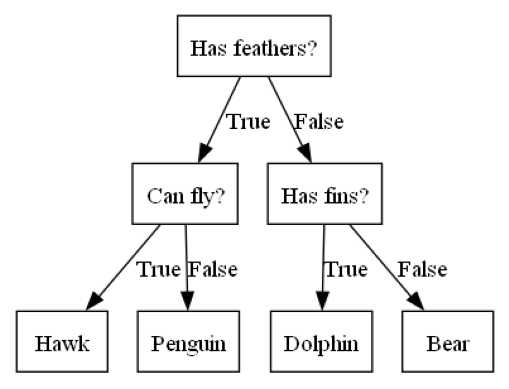

In [22]:
mglearn.plots.plot_animal_tree()

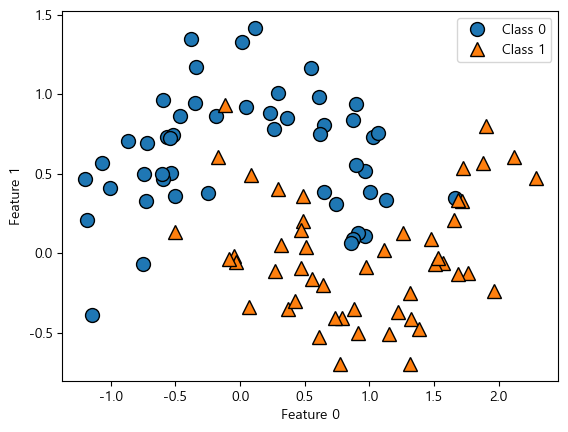

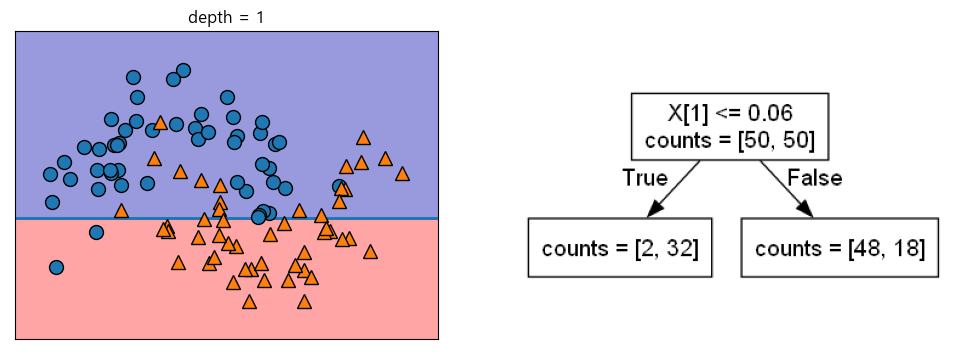

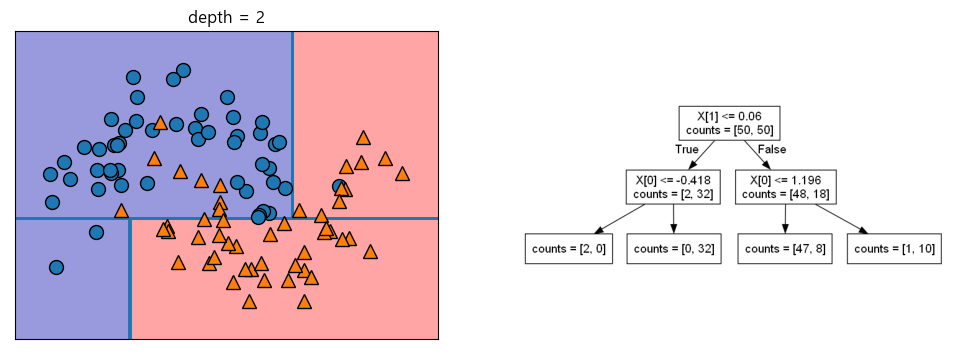

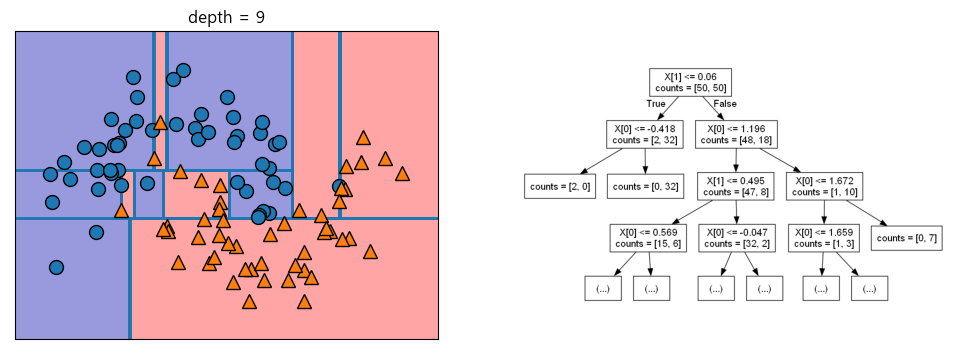

In [23]:
mglearn.plots.plot_tree_progressive()

## (1) 간단한 예제

In [24]:
iris = load_iris()

X_train, X_test, y_train, y_test= train_test_split(iris.data,iris.target, random_state=11, test_size=0.2)

In [25]:
model = DecisionTreeClassifier(random_state=155)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=155)

In [26]:
print('훈련점수:',model.score(X_train,y_train))
print('테스트점수:',model.score(X_test,y_test))

훈련점수: 1.0
테스트점수: 0.8666666666666667


In [27]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='data/tree.dot',class_names=iris.target_names, feature_names=iris.feature_names, filled=True)

In [28]:
import graphviz

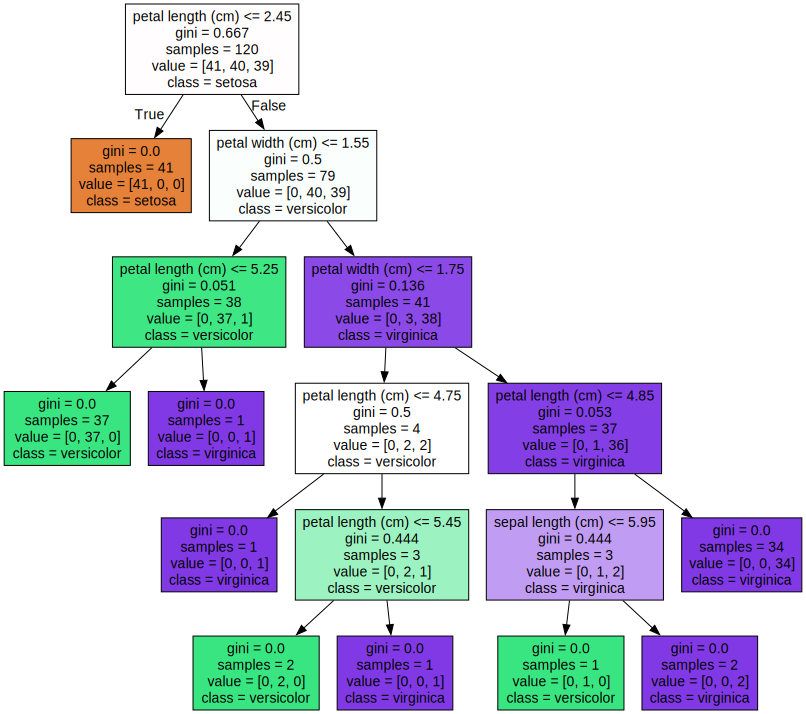

In [29]:
f = open('data/tree.dot')
graphviz.Source(f.read())

In [30]:
from sklearn.datasets import make_moons

In [31]:
X,y = make_moons(n_samples=100,noise=0.25, random_state=42)

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=11, test_size=0.2)

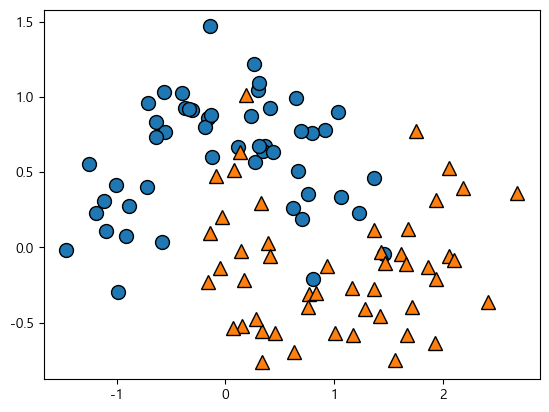

In [32]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [33]:
model1 = KNeighborsClassifier().fit(X_train, y_train)
print('훈련점수:',model1.score(X_train,y_train))
print('테스트점수:',model1.score(X_test,y_test))

훈련점수: 0.95
테스트점수: 0.9


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [34]:
model2 = LinearSVC().fit(X_train, y_train)
print('훈련점수:',model2.score(X_train,y_train))
print('테스트점수:',model2.score(X_test,y_test))

훈련점수: 0.8375
테스트점수: 0.9


In [35]:
model3 = LogisticRegression().fit(X_train, y_train)
print('훈련점수:',model3.score(X_train,y_train))
print('테스트점수:',model3.score(X_test,y_test))

훈련점수: 0.8375
테스트점수: 0.9


In [36]:
model4 = DecisionTreeClassifier().fit(X_train, y_train)
print('훈련점수:',model4.score(X_train,y_train))
print('테스트점수:',model4.score(X_test,y_test))

훈련점수: 1.0
테스트점수: 0.8


## (2) 과적합 해소를 위한 복잡도 제어 : Prunning
- 종류
    - 사전 가지치기
    - 사후 가지치기
    - sklearn에서는 사후 가지치기만 지원
    
- 파라미터
    - min_samples_split
    - min_samples_leaf
    - max_features
    - **max_depth**
    - max_leaf_nodes

In [37]:
iris = load_iris()

X_train, X_test, y_train, y_test= train_test_split(iris.data,iris.target, random_state=11, test_size=0.2)

### 1) max_depth

In [38]:
model = DecisionTreeClassifier(random_state=155, max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=155)

In [39]:
print('훈련점수:',model.score(X_train,y_train))
print('테스트점수:',model.score(X_test,y_test))

훈련점수: 0.975
테스트점수: 0.9333333333333333


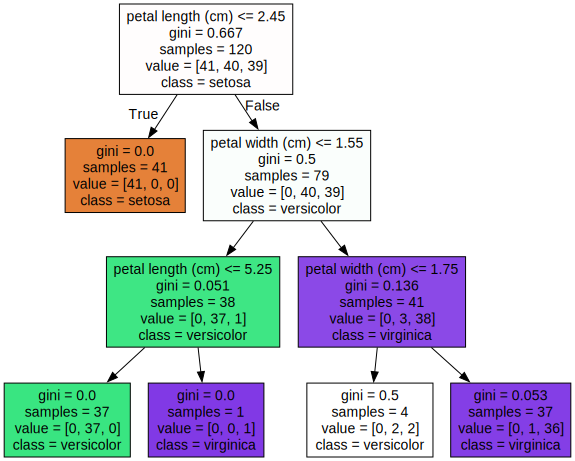

In [40]:
export_graphviz(model, out_file='data/tree.dot',class_names=iris.target_names, feature_names=iris.feature_names, filled=True)

graphviz.Source(open('data/tree.dot').read())

### 2) min_samples_split
- 분할하기 위한 최소한 샘플 수

훈련점수: 0.9833333333333333
테스트점수: 0.8666666666666667


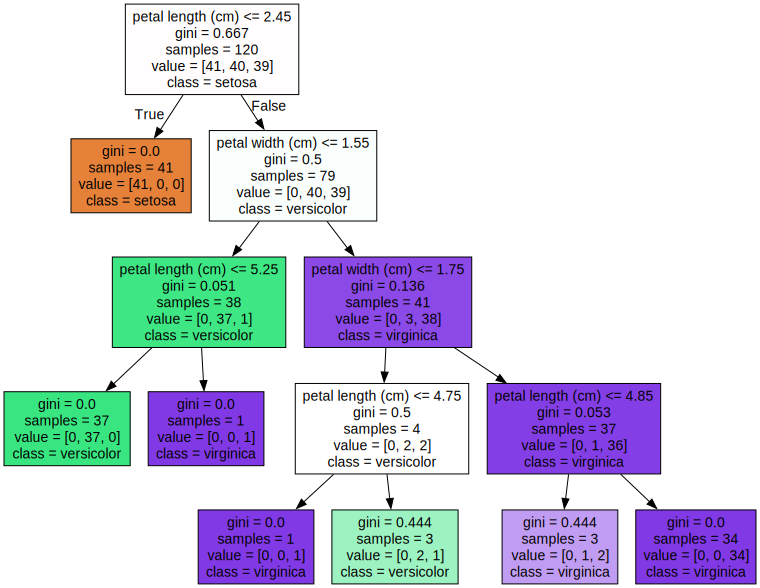

In [41]:
model = DecisionTreeClassifier(random_state=155, min_samples_split=4)
model.fit(X_train, y_train)

print('훈련점수:',model.score(X_train,y_train))
print('테스트점수:',model.score(X_test,y_test))

export_graphviz(model, out_file='data/tree.dot',class_names=iris.target_names, feature_names=iris.feature_names, filled=True)

graphviz.Source(open('data/tree.dot').read())

### 3) min_samples_leaf
- 리프노드가 되기 위한 최소한의 샘플 수

훈련점수: 0.9666666666666667
테스트점수: 0.9333333333333333


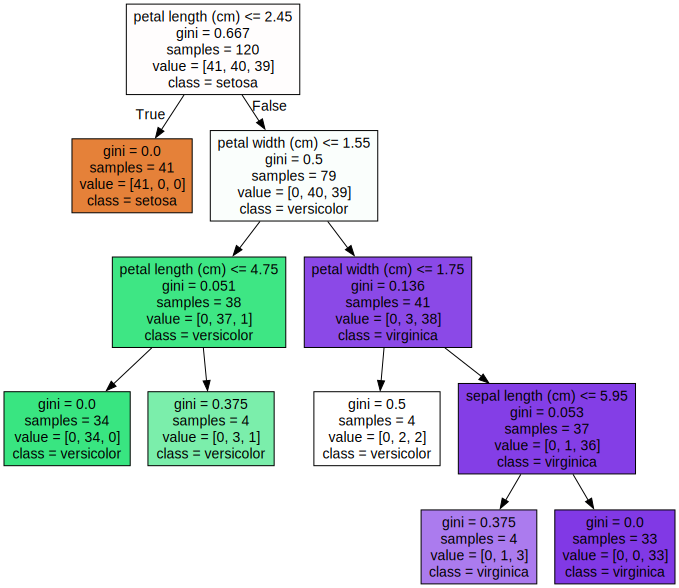

In [42]:
model = DecisionTreeClassifier(random_state=155, min_samples_leaf=4)
model.fit(X_train, y_train)

print('훈련점수:',model.score(X_train,y_train))
print('테스트점수:',model.score(X_test,y_test))

export_graphviz(model, out_file='data/tree.dot',class_names=iris.target_names, feature_names=iris.feature_names, filled=True)

graphviz.Source(open('data/tree.dot').read())

## (3) 특성 중요도를 이용한 성능 개선

In [43]:
iris = load_iris()

X_train, X_test, y_train, y_test= train_test_split(iris.data,iris.target, random_state=11, test_size=0.2)

In [44]:
model = DecisionTreeClassifier(random_state=155, min_samples_leaf=4)
model.fit(X_train, y_train)

print('훈련점수:',model.score(X_train,y_train))
print('테스트점수:',model.score(X_test,y_test))

훈련점수: 0.9666666666666667
테스트점수: 0.9333333333333333


In [45]:
print(model.feature_importances_)
print(iris.feature_names)

[0.00594727 0.         0.5459484  0.44810433]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<AxesSubplot:>

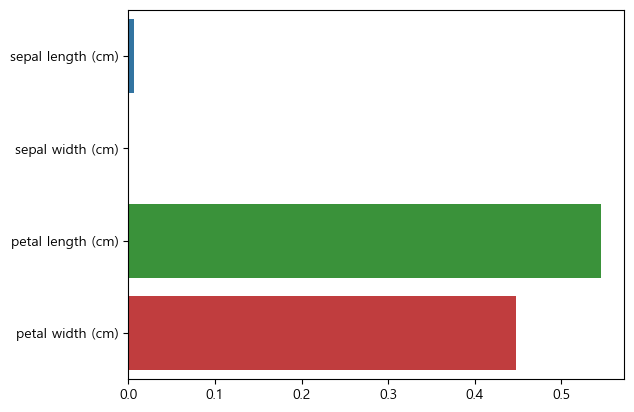

In [46]:
sns.barplot(x=model.feature_importances_, y= iris.feature_names)

### 2) breast cancer sample

In [47]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test= train_test_split(cancer.data,cancer.target, random_state=42, stratify=cancer.target)

In [48]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [49]:
model= DecisionTreeClassifier(random_state=155, max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=155)

훈련점수: 0.9882629107981221
테스트점수: 0.9440559440559441


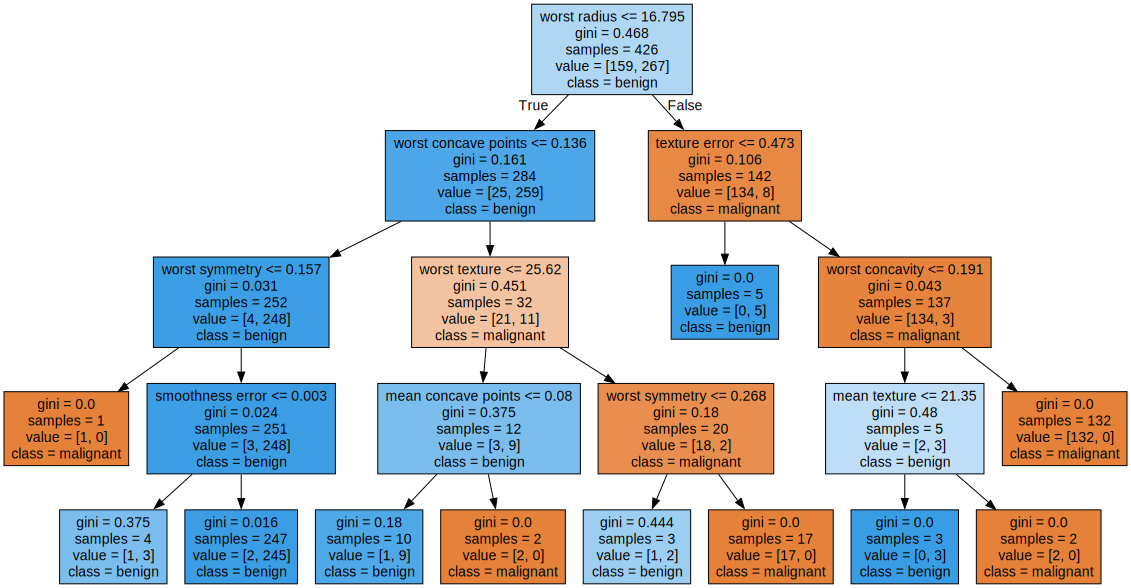

In [52]:
print('훈련점수:',model.score(X_train,y_train))
print('테스트점수:',model.score(X_test,y_test))

export_graphviz(model, out_file='data/tree.dot',
                class_names=cancer.target_names, 
                feature_names=cancer.feature_names, filled=True)

graphviz.Source(open('data/tree.dot').read())

In [53]:
for name, value in zip(cancer.feature_names, model.feature_importances_):
    print(name, value)

mean radius 0.0
mean texture 0.012584624093079158
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.014157702104714051
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.0
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.033231272995787146
worst perimeter 0.0
worst area 0.0
worst smoothness 0.0
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.02208284651219965
worst fractal dimension 0.0


<AxesSubplot:>

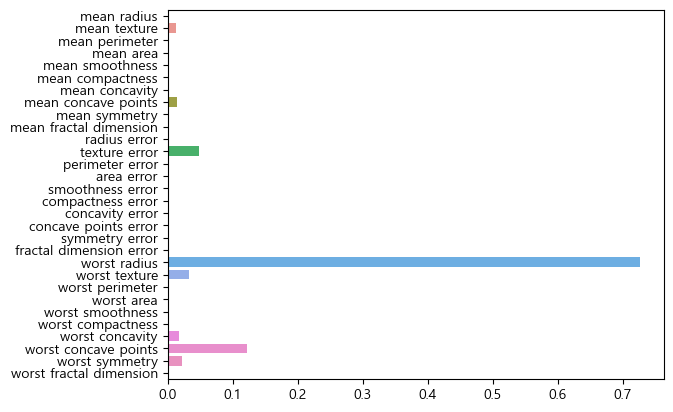

In [54]:
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)
# 전체 변수를 고려하는 것 아님. random_state에 따라 달라진다.

### 3) 특성 중요도를 통해 추출한 특성만을 사용했을 때 성능 개선 효과

In [59]:
X= iris.data[:, [2,3]]
y= iris.target

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 11, test_size=0.2)

In [63]:
model= DecisionTreeClassifier(random_state=155, min_samples_leaf=4)
model.fit(X_train, y_train)

print('훈련점수:',model.score(X_train,y_train))
print('테스트점수:',model.score(X_test,y_test))
# 전체 특성을 사용했을 때와 비슷한 결과

훈련점수: 0.9666666666666667
테스트점수: 0.9333333333333333


## (4) 실습: 서울 지역 동 분류
- 서울 지역(구)의 경도와 위도를 사용해서 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류

In [64]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [65]:
train_df= pd.DataFrame(district_dict_list)
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [66]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [67]:
test_df= pd.DataFrame(dong_dict_list)
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


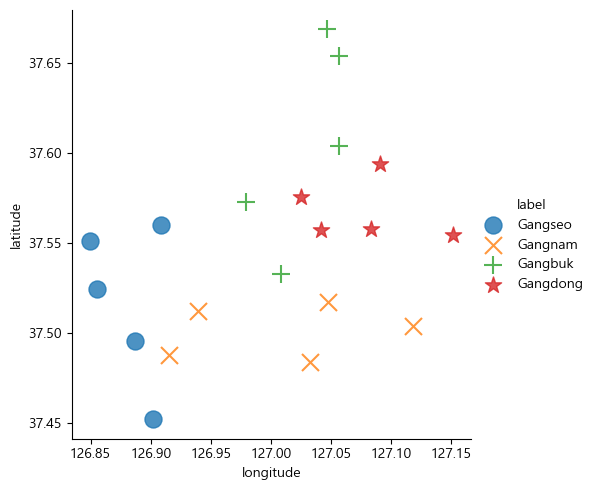

In [71]:
sns.lmplot('longitude', 'latitude',data= train_df, fit_reg=False, hue= 'label', markers=['o','x','+','*'], scatter_kws={'s':150})

In [72]:
#### 구 이름과 동 이름은 삭제

train_df.drop(['district'], axis=1, inplace= True)
test_df.drop(['dong'], axis=1, inplace= True)

In [74]:
train_df, test_df

(     latitude   longitude     label
 0   37.551000  126.849500   Gangseo
 1   37.524240  126.855396   Gangseo
 2   37.495400  126.887400   Gangseo
 3   37.451900  126.902000   Gangseo
 4   37.560229  126.908728   Gangseo
 5   37.487517  126.915065   Gangnam
 6   37.512400  126.939300   Gangnam
 7   37.483700  127.032400   Gangnam
 8   37.517200  127.047300   Gangnam
 9   37.503510  127.117898   Gangnam
 10  37.532561  127.008605   Gangbuk
 11  37.573000  126.979400   Gangbuk
 12  37.603979  127.056344   Gangbuk
 13  37.654200  127.056800   Gangbuk
 14  37.668800  127.047100   Gangbuk
 15  37.557340  127.041667  Gangdong
 16  37.575759  127.025288  Gangdong
 17  37.557562  127.083467  Gangdong
 18  37.554194  127.151405  Gangdong
 19  37.593684  127.090384  Gangdong,
      latitude   longitude     label
 0   37.489853  126.854547   Gangseo
 1   37.501394  126.859245   Gangseo
 2   37.537759  126.847951   Gangseo
 3   37.575817  126.815719   Gangseo
 4   37.577039  126.891620   Gangseo


In [75]:
X_train= train_df[['latitude','longitude']]
y_train= train_df['label']

X_test= test_df[['latitude','longitude']]
y_test= test_df['label']

In [77]:
# Label값을 인코딩

le= LabelEncoder()
y_enc= le.fit_transform(y_train)
y_enc

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [82]:
model= DecisionTreeClassifier(random_state=35).fit(X_train, y_enc)

In [86]:
le.classes_

array(['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'], dtype=object)

In [85]:
# print(model.score(X_test, y_test))
pred= model.predict(X_test)
print(accuracy_score(y_test.values, le.classes_[pred]))

1.0


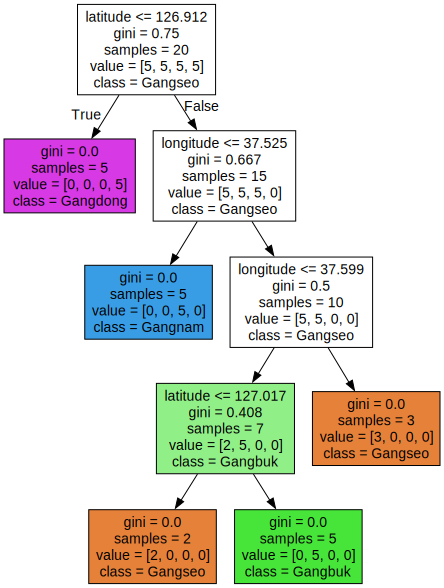

In [83]:
graph= export_graphviz(model, out_file=None,
                class_names=['Gangseo', 'Gangbuk', 'Gangnam','Gangdong'], 
                feature_names=['longitude','latitude'], filled=True)

graphviz.Source(graph)

# 2. RandomForest
작은 트리 여러개 병렬처리. 
- 앙상블(Ensemble) 방식
- 여러개의 작은 decision tree를 생성 (일부분의 data)
    - 중복된 데이터 허용
    - 과적합 문제 해소
- random selection of feature set
- 투표(voting) 방식으로 예측

In [87]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise=0.25, random_state=42)

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=11, test_size=0.2)

In [93]:
model = RandomForestClassifier(random_state=2, n_estimators=5).fit(X_train, y_train)
print('훈련점수:',model.score(X_train,y_train))
print('테스트점수:',model.score(X_test,y_test))

훈련점수: 0.975
테스트점수: 0.9


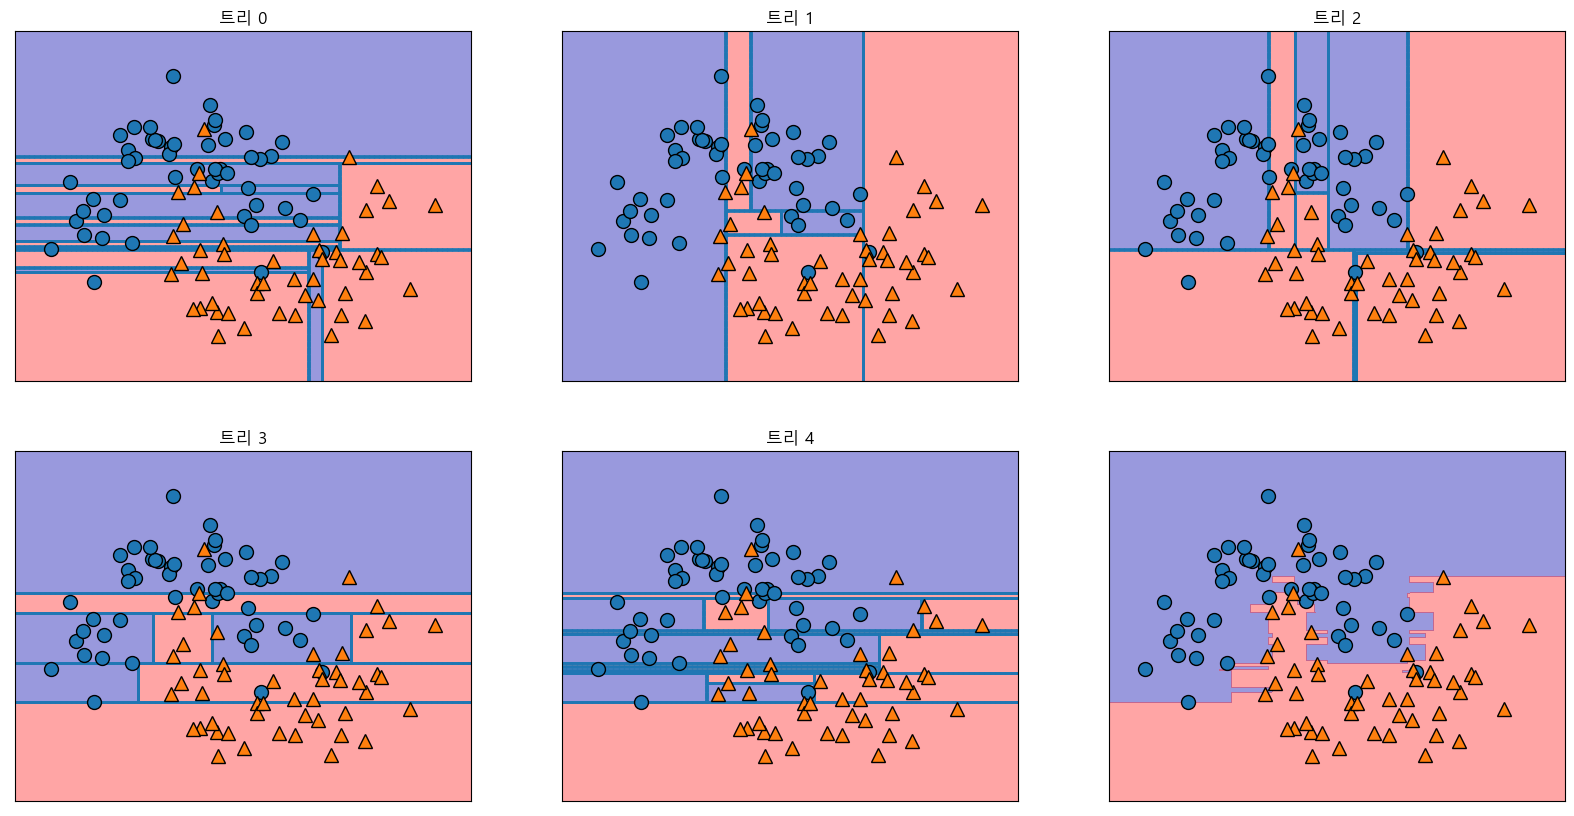

In [94]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), model.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(model, X, fill=True, ax=axes[-1, -1], alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [95]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test= train_test_split(cancer.data,cancer.target,
                                                   random_state=42, stratify=cancer.target)

In [99]:
model = RandomForestClassifier(random_state=155,n_estimators=100)
model.fit(X_train, y_train)

print('훈련점수:',model.score(X_train,y_train))
print('테스트점수:',model.score(X_test,y_test))

# export_graphviz(model, out_file='data/tree.dot',
#                 class_names=cancer.target_names, 
#                 feature_names=cancer.feature_names, filled=True)

# graphviz.Source(open('data/tree.dot').read())

훈련점수: 1.0
테스트점수: 0.958041958041958


<AxesSubplot:>

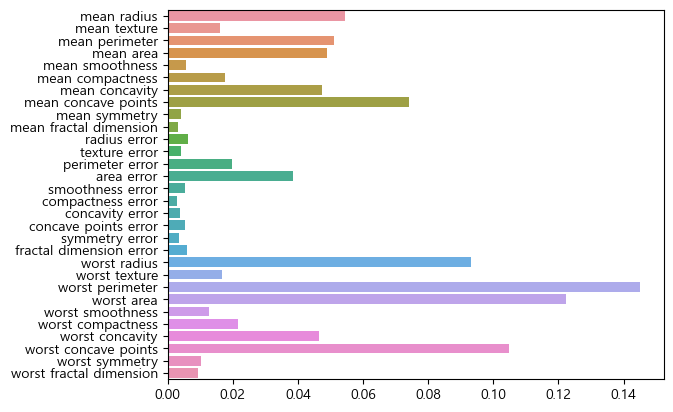

In [100]:
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

## (2) 숫자 손글씨 이미지 데이터

In [101]:
from sklearn.datasets import load_digits

In [102]:
mnist= load_digits()
print(mnist.data.shape)

X, y= mnist.data, mnist.target
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

(1797, 64)


In [104]:
model= DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print('훈련 점수: ', model.score(X_train, y_train))
print('테스트 점수:', model.score(X_test, y_test))

훈련 점수:  1.0
테스트 점수: 0.8472222222222222


In [105]:
model= RandomForestClassifier(random_state=0).fit(X_train, y_train)

print('훈련 점수: ', model.score(X_train, y_train))
print('테스트 점수:', model.score(X_test, y_test))

훈련 점수:  1.0
테스트 점수: 0.9694444444444444


### 적합도 검정

In [107]:
dt_model= cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=10, scoring='accuracy')

rf_model= cross_val_score(RandomForestClassifier(), X_train, y_train, cv=10, scoring='accuracy')

In [108]:
print(np.mean(dt_model))
print(np.mean(rf_model))
# 큰 차이 없음 -> 적합도 만족

0.8503545066045065
0.9784139471639473


<AxesSubplot:>

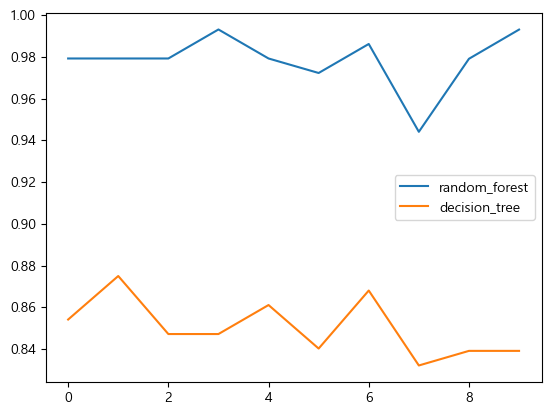

In [110]:
df= pd.DataFrame({'random_forest':rf_model, 'decision_tree':dt_model})
df.plot()

## (3) 독버섯 데이터
- https://archive.ics.uci.edu/ml/datasets/mushroom
- agaricus-lepiota.data 다운로드
- 파일명 변경: mushroooms.csv

In [113]:
import urllib.request as req

url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
req.urlretrieve(url, 'data/mushrooms.csv')
print('완료')

완료


In [114]:
mr= pd.read_csv('data/mushrooms.csv', header=None)
mr.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [116]:
print(mr.shape)
mr.info()

(8124, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      8124 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 

In [117]:
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [133]:
#### X, y로 나누기
X= mr.iloc[:,1:]
y= mr.iloc[:,0]
print(X.head())
# X= mr.drop(0, axis=1)
# y= mr[0]

  1  2  3  4  5  6  7  8  9  10  ... 13 14 15 16 17 18 19 20 21 22
0  x  s  n  t  p  f  c  n  k  e  ...  s  w  w  p  w  o  p  k  s  u
1  x  s  y  t  a  f  c  b  k  e  ...  s  w  w  p  w  o  p  n  n  g
2  b  s  w  t  l  f  c  b  n  e  ...  s  w  w  p  w  o  p  n  n  m
3  x  y  w  t  p  f  c  n  n  e  ...  s  w  w  p  w  o  p  k  s  u
4  x  s  g  f  n  f  w  b  k  t  ...  s  w  w  p  w  o  e  n  a  g

[5 rows x 22 columns]


In [136]:
#### feature들을 숫자로 인코딩
X_enc= LabelEncoder()

for col in X.columns:
    X[col]= X_enc.fit_transform(X[col])

y_enc= LabelEncoder()
y= y_enc.fit_transform(y)

C:\Users\acorn\AppData\Local\Temp\ipykernel_16956\4131096383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]= X_enc.fit_transform(X[col])


In [137]:
X.head()
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [138]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=0)

In [153]:
#### KNN
model = KNeighborsClassifier().fit(X_train, y_train)
print('훈련점수:',model.score(X_train,y_train))
print('테스트점수:',model.score(X_test,y_test))
pred= model.predict(X_test)
print(classification_report(y_test, pred))

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


훈련점수: 0.999015263417036


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


테스트점수: 0.9970457902511078
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       0.99      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [155]:
#### Logistic Regression
model = LogisticRegression(C=10, max_iter=10000).fit(X_train, y_train)
print('훈련점수:',model.score(X_train,y_train))
print('테스트점수:',model.score(X_test,y_test))
pred= model.predict(X_test)
print(classification_report(y_test, pred))

훈련점수: 0.9632365009026752
테스트점수: 0.9581486952240276
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1061
           1       0.96      0.95      0.96       970

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



In [151]:
#### Decision Tree
model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print('훈련점수:',model.score(X_train,y_train))
print('테스트점수:',model.score(X_test,y_test))
pred= model.predict(X_test)
print(classification_report(y_test, pred))

훈련점수: 1.0
테스트점수: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [152]:
### RandomForest
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print('훈련점수:',model.score(X_train,y_train))
print('테스트점수:',model.score(X_test,y_test))
pred= model.predict(X_test)
print(classification_report(y_test, pred))

훈련점수: 1.0
테스트점수: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

